In [1]:
# Let's do simple linear regression
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

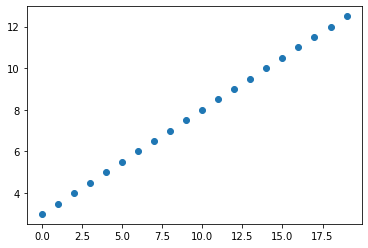

In [2]:
np.random.seed(179)

n = 20 # number of samples
f = 1  # number of features

def generate_data(noise = 3, n = 20):
    x = np.arange(n)
    delta = np.random.uniform(-noise, noise, size=(n,))
    y = 0.5 * x + 3 + delta
    
    return x, y

X, Y = generate_data(noise = 0, n = n)

plt.scatter(X,Y)

In [3]:
X = X.reshape((f, n))
Y = Y.reshape((1, n))


In [34]:
from abc import ABC, abstractmethod

class Activation(ABC):
    'This is an abstract class for activation functions'
    def __init__(self, name):
        self.name = name
        
    @abstractmethod
    def apply(self, M):
        return

class Identity(Activation):
    'Applies iddentity'
    def __init__(self, name='Identity'):
        super().__init__(name)
    
    def apply(self, M):
        return M


class Cost(ABC):
    'This is an abstract class for Cost functions'
    def __init__(self, name="Default Cost"):
        self.name = name
    
    @abstractmethod
    def calculate(self, Y, yhat):
        pass


class MSE(Cost):
    'Mean Squared Error Cost'
    def __init__(self):
        super().__init__("MSE")
    
    def calculate(self, Y, yhat):
        assert (Y.shape == yhat.shape) and (Y.shape[0] == 1) and (len(Y.shape) == 2)
        n = Y.shape[1]
        
        return np.sum((Y - yhat) ** 2, axis = 0) / n


class Layer:
    def __init__(self, f, n, activation=Identity):
        self.f = f
        self.n = n
        
        self.W = np.random.rand(1, f)
        self.B = np.zeros((1, n))  # np.random.rand(1, n)
        self.activation = activation()
    
    def forward(self, X):
        assert X.shape == (f, n)
        return self.activation.apply((np.dot(self.W, X) + self.B))

In [23]:
L = Layer(f, n)

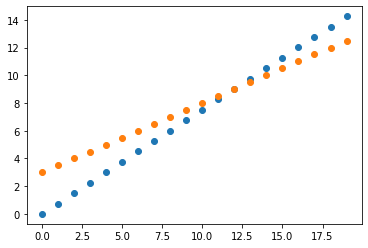

In [28]:
yhat = L.forward(X)
plt.scatter(X, yhat)
plt.scatter(X, Y)